# Hello, this is Group 37. Out solution for Question 1 is here :D

# Question 1.1: 
Look at the features in the dataset. What does lot type mean? Hint: Note that data.gov.sg gets its data from the Land Transport Authority (LTA). Try searching for the LTA Datamall API documentation.

## Answer: 
From the LTA_DataMall_API documentation, we can see that lot_type shows the type of lots inside the carpark i.e. for Cars (C), Heavy Vehicles (H) & Motorcycles (Y) as shown below

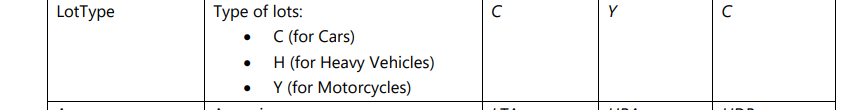

# Question 1.2: 
Try making an API call for the data from a single specified date & time. Then, do the same thing for the next second of the initially chosen date & time. Notice that “update time” is unchanged. Carry out and document a systematic approach to approximate the frequency at which the data values are updated.

## Manual Approach: 
From the LTA_DataMall_API documentation, we can see that lot_type shows the type of lots inside the carpark i.e. for Cars (C), Heavy Vehicles (H) & Motorcycles (Y) as shown below

## Notes
There are 2 get_data function below to query data from the LTA API. The first `get_data` function is mainly used for fast one-time access as we do not ignore the missing values. The second `get_data_except` is similar to the first function but with a handles exception for the missing values. This is mainly used when querrying a range of continuous data where missing values is close to unavoidable.

In [27]:
import requests
import json
import pandas as pd

def get_data(year, month, day, hour, minute, second):
    site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
    response_API = requests.get(site)
    data = response_API.text
    data = json.loads(data)
    df = pd.DataFrame()
    data = data["items"][0]["carpark_data"]
    with open("EE4211data.json", 'w') as fp:
        json.dump(data, fp)
    df = pd.read_json("EE4211data.json")
    for heading in ("total_lots","lot_type","lots_available"):
        df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
    df = df.drop(["carpark_info"], axis=1)
    
    return df

def get_data_clean(year, month, day, hour, minute, second):
    site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
    response_API = requests.get(site)
    data = response_API.text
    data = json.loads(data)
    df = pd.DataFrame()
    try:    
        data = data["items"][0]["carpark_data"]
        with open("EE4211data.json", 'w') as fp:
            json.dump(data, fp)
        df = pd.read_json("EE4211data.json")
        for heading in ("total_lots","lot_type","lots_available"):
            df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
        df = df.drop(["carpark_info"], axis=1)
    except KeyError:
        pass
    
    return df

In [18]:
get_data("2022", "4", "12", "12", "30", "0")

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-04-12T12:12:32,105,C,0
1,HLM,2022-04-12T12:12:42,583,C,0
2,RHM,2022-04-12T12:12:32,329,C,106
3,BM29,2022-04-12T12:12:32,97,C,1
4,Q81,2022-04-12T12:12:32,96,C,0
...,...,...,...,...,...
1961,B65M,2022-04-12T12:11:58,679,C,499
1962,B65L,2022-04-12T12:11:58,5,C,0
1963,BE3,2022-04-12T11:30:52,306,C,148
1964,BE3R,2022-04-12T11:30:52,195,C,150


In [12]:
get_data("2022", "4", "12", "12", "30", "1")

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-04-12T12:12:32,105,C,0
1,HLM,2022-04-12T12:12:42,583,C,0
2,RHM,2022-04-12T12:12:32,329,C,106
3,BM29,2022-04-12T12:12:32,97,C,1
4,Q81,2022-04-12T12:12:32,96,C,0
...,...,...,...,...,...
1961,B65M,2022-04-12T12:11:58,679,C,499
1962,B65L,2022-04-12T12:11:58,5,C,0
1963,BE3,2022-04-12T11:30:52,306,C,148
1964,BE3R,2022-04-12T11:30:52,195,C,150


In [10]:
get_data("2022", "4", "12", "13", "30", "0")

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-04-12T13:13:32,105,C,0
1,HLM,2022-04-12T13:13:13,583,C,0
2,RHM,2022-04-12T13:13:32,329,C,121
3,BM29,2022-04-12T13:13:32,97,C,5
4,Q81,2022-04-12T13:13:33,96,C,0
...,...,...,...,...,...
1959,B65M,2022-04-12T13:13:28,679,C,503
1960,B65L,2022-04-12T13:13:28,5,C,0
1961,BE3,2022-04-12T12:14:59,306,C,159
1962,BE3R,2022-04-12T12:14:59,195,C,147


In [6]:
get_data("2022", "4", "12", "11", "30", "0")

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-04-12T11:11:32,105,C,0
1,HLM,2022-04-12T11:11:40,583,C,52
2,RHM,2022-04-12T11:11:32,329,C,125
3,BM29,2022-04-12T11:11:32,97,C,5
4,Q81,2022-04-12T11:11:30,96,C,0
...,...,...,...,...,...
1960,B65M,2022-04-12T11:10:59,679,C,486
1961,B65L,2022-04-12T11:10:59,5,C,1
1962,BE3,2022-04-12T10:45:49,306,C,142
1963,BE3R,2022-04-12T10:45:49,195,C,146


In [9]:
get_data("2022", "4", "12", "12", "29", "0")

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-04-12T12:12:32,105,C,0
1,HLM,2022-04-12T12:12:42,583,C,0
2,RHM,2022-04-12T12:12:32,329,C,106
3,BM29,2022-04-12T12:12:32,97,C,1
4,Q81,2022-04-12T12:12:32,96,C,0
...,...,...,...,...,...
1961,B65M,2022-04-12T12:11:58,679,C,499
1962,B65L,2022-04-12T12:11:58,5,C,0
1963,BE3,2022-04-12T11:30:52,306,C,148
1964,BE3R,2022-04-12T11:30:52,195,C,150


In [8]:
get_data("2022", "4", "12", "12", "31", "0")

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-04-12T12:12:32,105,C,0
1,HLM,2022-04-12T12:12:42,583,C,0
2,RHM,2022-04-12T12:12:32,329,C,106
3,BM29,2022-04-12T12:12:32,97,C,1
4,Q81,2022-04-12T12:12:32,96,C,0
...,...,...,...,...,...
1961,B65M,2022-04-12T12:11:58,679,C,499
1962,B65L,2022-04-12T12:11:58,5,C,0
1963,BE3,2022-04-12T11:30:52,306,C,148
1964,BE3R,2022-04-12T11:30:52,195,C,150


## Analysis of Question 1.2 (Manual): 
There is no difference in the data between one second difference of get_data("2022", "4", "12", "12", "30", "0") & get_data("2022", "4", "12", "12", "30", "1") based on the outputs above

There is a slight difference in the data between one hour difference of get_data("2022", "4", "12", "12", "30", "0") & get_data("2022", "4", "12", "13", "30", "0") & get_data("2022", "4", "12", "11", "30", "0") based on the outputs above

There is no difference in the data between one minute difference of get_data("2022", "4", "12", "12", "30", "0"), get_data("2022", "4", "12", "12", "29", "0") & get_data("2022", "4", "12", "12", "31", "0") based on the outputs above

## Systematic Approach: 
Automate the process and scan through consecutive time period and compare their output

In [13]:
# Question 1.2 continuation
df_list = []

for x in range(60):
    year = "2022"
    month = "4"
    day = "12"
    hour = "12"
    minute = str(x)
    second = "30"
    df_list.append(get_data(year, month, day, hour, minute, second))
    
for x in range(59):
    json_dict1 = json.loads(df_list[x].to_json(orient = 'split'))
    json_dict2 = json.loads(df_list[x+1].to_json(orient = 'split'))
    print(str(x), end =" ")
    print(sorted(json_dict1.items()) == sorted(json_dict2.items()))

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 False
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True
23 True
24 True
25 True
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 False
44 True
45 True
46 True
47 True
48 True
49 True
50 True
51 True
52 True
53 True
54 True
55 True
56 True
57 True
58 True


## Analysis of Question 1.2 (Systematic): 
The frequency at which the data values are updated is approximately every 30 minutes or (1/1800) Hz. JSON files are read then compared every minute. At the 12th and 43rd comparison, the data values changes which is indicated by a False output. Therefore, every 42-12 = 30 minutes, the data value are updated in their system.

# Question 1.3(i): 
How many carparks are included in the data.gov.sg car park database?

In [4]:
# Question 1.3: (i) How many carparks are included in the data.gov.sg car park database?
import requests
import json
import pandas as pd

def get_data(year, month, day, hour, minute, second):
  site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
  # print(site)
  response_API = requests.get(site)
  data = response_API.text
  data = json.loads(data)
  df = pd.DataFrame()

  # Skip malfunctioning data
  if "items" in data:
    timestamp = data["items"][0]["timestamp"]

    data = data["items"][0]["carpark_data"]
    with open("EE4211data.json", 'w') as fp:
        json.dump(data, fp)
    df = pd.read_json("EE4211data.json")
    for heading in ("total_lots","lot_type","lots_available"):
        df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
    df = df.drop(["carpark_info"], axis=1)

  return df

In [5]:
#continue Question 1.3: (i) How many carparks are included in the data.gov.sg car park database?
def total_carparks_included_in_database(year, month, day):
  for x in range(1,24): #24 hours in a day so this checks no of carparks in a day
    hour = str(x) 
    minute = "00" 
    second = "00"
    carpark_checker=get_data(year, month, day, hour, minute, second) #Calling the dataframe
    
    if carpark_checker.empty: #Check if carpark has malfunctioning and anomalous sensors which does not report it's data properly 
      return "This is a malfunctioning and anomalous sensors as it does not report it's data properly "

    else:
      return carpark_checker["carpark_number"].drop_duplicates().count() #Removing duplicate carpark names because they have an impact in the overall number of carpark numbers as we want distinct numbers of carpark numbers 

print(total_carparks_included_in_database("2022", "4", "12"))

#Answer 1.3 (i): There are 1960 carparks in the data.gov.sg car park database

# Alternative method:
def total_carparks_included_in_database2(year, month, day, hour, minute, second):
  df = get_data(year, month, day, hour, minute, second)
  if df.empty:
    return -1 # this signifies that carpark sensor is mulfunctioning or faulty 
  return df["carpark_number"].drop_duplicates().count() #Removing duplicate carpark names because they have an impact in the overall number of carpark numbers as we want distinct numbers of carpark numbers only

total_carparks_included_in_database2("2022", "4", "12", "01", "00", "00") 

1960


1960

## Answer: 
There are 1960 carparks in the data.gov.sg car park database at 2022-04-12 11:59:45

# Question 1.3(ii): 
Does this number vary based on the time? You should notice that it does vary with time.

In [24]:
import requests
import json
import pandas as pd

year = "2018"
month = "4"
day = "12"
hour = "12"
minute = "00" 
second = "00"
i = 0 #Setting iterator as 0 to start off with the year 2018

while i <= 4: #Printing out the number of carparks from 2018-2022
    try:
        site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={int(year)+i}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'   
        # print(site)
        response_API = requests.get(site)
        data = response_API.text
        data = json.loads(data)
        timestamp = data["items"][0]["timestamp"]
        print(timestamp)
        data = data["items"][0]["carpark_data"]
        with open("EE4211data.json", 'w') as fp:
            json.dump(data, fp)
        df = pd.read_json("EE4211data.json")
        carparks_number = df["carpark_number"].drop_duplicates()
        i+=1
        print("Number of carparks:", len(carparks_number)) #Print out the total number of carparks in the data.gov.sg database as signified by "carpark_number"
    except:
        i+=1
        print("Missing entry")
        pass

2018-04-12T11:59:45+08:00
Number of carparks: 1700
Missing entry
2020-04-12T11:59:27+08:00
Number of carparks: 1904
2021-04-12T11:59:27+08:00
Number of carparks: 1936
2022-04-12T11:59:27+08:00
Number of carparks: 1960


## Answer: 
Yes, the number of carpark numbers does indeed vary with time on a 5 year interval from 1700 in 2018 to 1960 in 2022

# Question 1.3(iii): 
A carpark may have malfunctioning sensors and nor report its data. Identify one of these
carparks with anomalous sensors and a time period where that carpark’s sensors were
malfunctioning.

In [2]:
#continue Question 1.3: (ii) Does this number vary based on the time? You should notice that it does vary with time.
import requests
import json
import pandas as pd

year = "2018"
month = "7"
day = "12"
hour = "12"
minute = "00" 
second = "00"
i = 0 #Setting iterator as 0 to start off with the year 2018

while i <= 4: #Printing out the number of carparks from 2018-2022
    try:
        site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={int(year)+i}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'   
        # print(site)
        response_API = requests.get(site)
        data = response_API.text
        data = json.loads(data)
        timestamp = data["items"][0]["timestamp"]
        print(timestamp)
        data = data["items"][0]["carpark_data"]

        with open("EE4211data.json", 'w') as fp: 
            json.dump(data, fp)
        df = pd.read_json("EE4211data.json")

        carparks_number = df["carpark_number"].drop_duplicates()
        i+=1
        print(df[(df['lots_available'] < 0) | (df['lots_available']> df['total_lots'])]) #If sensor is malfunctioning, it will return a negative number (not >=0) and lots_available is more than the total no of carpark lots which is odd as well
    except KeyError:
        pass


2018-07-12T11:59:29+08:00
2019-07-12T11:59:27+08:00
2020-07-12T11:59:27+08:00
2021-07-12T11:59:27+08:00
2022-07-12T11:59:27+08:00


## Explanation: 
If sensor is malfunctioning, it will return a negative number (not >=0) and lots_available is more than the total no of carpark lots which is odd as well and `print(df[(df["lots_available"]<'0') | (df["lots_available"]> df["total_lots"])])` does that

# Question 1.4: 
Generate hourly readings from the raw data. Select a one month interval and plot the
hourly data (time-series) for that interval (aggregate results instead of plotting for each
location individually). Identify any patterns in the visualization. Note: You will have to
decide what to do if there are no carpark readings for a certain hour, for example, should
you impute the missing data or ignore it.

## Explanation: 
Here, we are generating the cumulative data per month for each lot types in each hourly time period. The aggregated hourly data will alll then be passed to the array of All_LotC, All_LotH and All_LotH for each types respectively.

*NB: for the get_data function call, we used the get_data_except function defined above to ignore missing values.*

In [28]:
# Question 1.4
All_LotC=[0]*23
ALL_LotH=[0]*23
All_LotY=[0]*23
for y in range (1,31):
    Lot_C=[]
    Lot_H=[]
    Lot_Y=[]
    for x in range(1,24):
        year = "2022"
        month = "4"
        day = str(y)
        hour = str(x)
        minute = "00"
        second = "00"
        chart = get_data_except(year, month, day, hour, minute, second)
        C = 0
        H = 0
        Y = 0
        for i in range(len(chart)):
            if chart.lot_type[i]=="C":
                C=C+int(chart.lots_available[i])

            if chart.lot_type[i]=="H":
                H=H+int(chart.lots_available[i])

            if chart.lot_type[i]=="Y":
                Y=Y+int(chart.lots_available[i])

        Lot_C.append(C)
        Lot_H.append(H)
        Lot_Y.append(Y)
    
    for o in range(0,len(All_LotC)):
        All_LotC[o]=All_LotC[o]+Lot_C[o]
        ALL_LotH[o]=ALL_LotH[o]+Lot_H[o]
        All_LotY[o]=All_LotY[o]+Lot_Y[o]

All_LotC

[9708301,
 9873381,
 8488511,
 9424225,
 9079450,
 9515406,
 9544617,
 11884862,
 12500664,
 11612877,
 13264272,
 12920607,
 12932395,
 13529192,
 13050259,
 12070938,
 13805272,
 12623600,
 12434607,
 11595828,
 10076054,
 10471177,
 9644549]

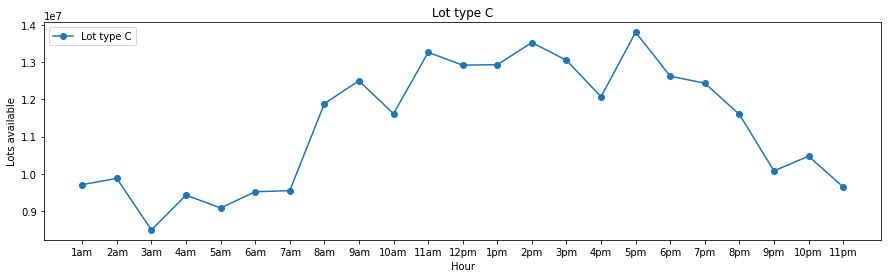

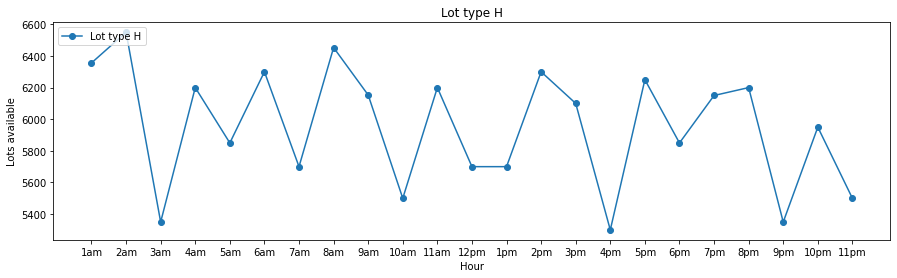

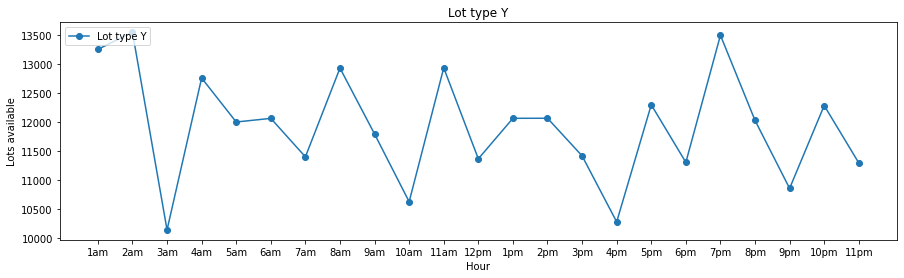

In [30]:
#continue Question 1.4
import matplotlib.pyplot as plt
def plot_graph(x_values, y_values, graph_name):
  f = plt.figure()
  f.set_figwidth(15)
  
  plt.plot(x_values, y_values,'-o')

  plt.title(graph_name)
  plt.xlabel("Hour")
  plt.ylabel("Lots available")
  plt.legend([graph_name], loc ="upper left") # can comment this if want
  plt.show()

x_values = ["1am","2am", "3am", "4am","5am" ,"6am","7am" ,"8am","9am","10am","11am","12pm","1pm","2pm","3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
plot_graph(x_values, All_LotC, "Lot type C")
plot_graph(x_values, ALL_LotH, "Lot type H")
plot_graph(x_values, All_LotY, "Lot type Y")

## Explanation: 
From the data received, the plot of the hourly data of each Lot is shown above. From the graph, it can be observed that Lot Type C (Car) has the most available space on the working hours which make sense considering people driving in the midday. For Lot Type H (Heavy Vehicle) and X (Motorcycle), however, not much variation is observed as these 2 are mainly used for item transportation (compared to Cars for personal use). Motorcycle mainly used for small items delivery (i.e, food) and heavy vehicles for large item transportation.

## Question 5: 
Intuitively, we expect that carpark availability across certain carparks to be correlated.
For example, many housing carparks would experience higher carpark availability during
working hours. Using the same interval chosen in 1.4, write a function to find the top five
carparks with which it shows the highest correlation. Demonstrate an example of this
function call using a randomly selected carpark.

## Explanation: 
The main approach of the question is to first identify all the carpark types. Once, we have the carparaks names, we can create a dataframe to store all the occupancy rate of the carparks. Next, we will iterate through all the hours and dates in the months to count the available lot. From the gathered data, we can then find the correlation between the carparks using the `corr` function

In [31]:
# Question 1.5
def get_carpark_names(year, month, day):
    df = get_data(year, month, day, "12", "00", "00")
    return df.carpark_number.drop_duplicates()

carpark_names = get_carpark_names("2022", "4", "15")
carpark_names

0       HE12
1        HLM
2        RHM
3       BM29
4        Q81
        ... 
1959    B65M
1960    B65L
1961     BE3
1962    BE3R
1963     B8B
Name: carpark_number, Length: 1961, dtype: object

In [33]:
overall_df = pd.DataFrame(0, columns=[hour for hour in range(0,24)], index= [carpark for _,carpark in carpark_names.items()])

# Fixed period on Q1.4
year = "2022"
month = "4"

print("Gathering data for a month...")
# 30 days in a month
for day in range(1,31):
    print("Processing day ", str(day))
    # each hour
    for hour in range(1,24):
        # print("Processing hour ", str(hour))
        hourly_df = get_data_except(year, month, str(day), str(hour), "00", "00")
        for _,row in hourly_df.iterrows():
            curr_carpark = row["carpark_number"]
            if curr_carpark in overall_df.index:
                overall_df.at[curr_carpark, hour] += int(row['lots_available'])
                               
overall_df

Gathering data for a month...
Processing day  1
Processing day  2
Processing day  3
Processing day  4
Processing day  5
Processing day  6
Processing day  7
Processing day  8
Processing day  9
Processing day  10
Processing day  11
Processing day  12
Processing day  13
Processing day  14
Processing day  15
Processing day  16
Processing day  17
Processing day  18
Processing day  19
Processing day  20
Processing day  21
Processing day  22
Processing day  23
Processing day  24
Processing day  25
Processing day  26
Processing day  27
Processing day  28
Processing day  29
Processing day  30


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
HE12,0,1495,1509,1450,1397,1039,717,273,53,65,...,171,435,503,498,441,233,321,597,984,1444
HLM,0,13157,13347,13593,13746,13057,12625,13430,12059,9114,...,1749,2872,4595,5636,7268,8093,8125,9428,11624,13243
RHM,0,3155,3214,3157,3460,3113,3103,3480,3626,3564,...,4027,4527,5267,5482,5510,5117,4402,4282,4002,3992
BM29,0,2058,2180,2193,2266,2135,2113,2225,1530,944,...,250,177,194,323,679,1042,1197,1425,1767,2070
Q81,0,2029,2107,2105,2195,2030,2024,1844,410,229,...,197,500,838,1049,840,678,714,1303,1701,2031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B65M,0,9172,9483,9422,9836,9149,9121,10329,11397,11428,...,12816,12621,12505,12927,13097,12914,11667,10905,10331,10216
B65L,0,0,0,0,0,0,0,0,0,11,...,0,1,0,0,0,0,0,0,0,0
BE3,0,1321,1251,1163,1193,1097,1259,1861,2639,2865,...,4245,4162,4051,4127,4089,3825,3074,2553,2179,1903
BE3R,0,3037,3110,3058,3135,2889,2887,3198,3518,3260,...,3769,3921,4000,4155,4180,3958,3309,3015,3204,3425


## Explanation: 
Last, we can randomly pick 5 carparks and find their correlation to the other carparks. Then sort the output and return the top 5.

In [34]:
import heapq

# Find top 5 correlation 
def gen_correlation(chosen_carpark, occupancy_df):
    corr_data = {}
    chosen_df = occupancy_df.loc[chosen_carpark]
    for carpark, data in occupancy_df.iterrows():
        if chosen_carpark == carpark:
            continue
        corr_val = chosen_df.corr(data)
#         print(carpark)
#         print(corr_val)
        corr_data[carpark] = corr_val
    return corr_data
    
corr_data = gen_correlation("HE12", overall_df)
# print(corr_data)
heapq.nlargest(5, corr_data, key=corr_data.get)

['Q80', 'GM3', 'B45', 'A37', 'J24']

In [36]:
import random

# pick 5 random carparks
random_carpark = random.choices(carpark_names, k=5)

for i in range(0,5):
    corr_data = gen_correlation(random_carpark[i], overall_df)
    top_5 = heapq.nlargest(5, corr_data, key=corr_data.get)
    print("Carpark", random_carpark[i], "has 5 top correlation with", top_5)

Carpark HG41 has 5 top correlation with ['CK13', 'HG33', 'J81M', 'U13', 'BJ8']
Carpark A53 has 5 top correlation with ['TAM1', 'U39', 'PDC4', 'BJ69', 'TM43']
Carpark JM31 has 5 top correlation with ['CC5', 'PP2', 'TGM2', 'PDC5', 'SB45']
Carpark J23 has 5 top correlation with ['W105', 'T51', 'W25', 'Y16', 'PM40']
Carpark TM43 has 5 top correlation with ['U39', 'BJ69', 'PD8W', 'BJ72', 'B80']


# Question 1.6 is the EE4211_Group_37_Project_Proposal for Question 3

For Question 3, what we intend to do is to create a certain number of classes or labels to group clusters of unaggregated data. There are 4 features that we will look at in the dataset in order to classify the data. The 4 features are the “update_datetime”, ”total_lots”, ”lot_type” and “lots_available”. The feature in the dataset that we intend to leave out is the “carpark_number”. We believe that “carpark_number” which mentions the number of car parks containing the cars is unnecessary  for grouping data. Looking at the 4 features mentioned earlier ,we can group each carpark to a specific category based on the qualities of its 4 features. The feature “lot_type” with it being a discrete feature, will make grouping  each carpark  easier since it has distinct values. However for other features such as “update_datetime”, “total_lots”, and “lots_available” the values are continuous. For features with continuous values thresholding will have to be set since each Carpark has its own unique set of values for “Update_datetime”, ”total_lots” and “lots_available”.
 
Based on the features, we notice that some of the carparks actually have malfunctioning sensors as it does not report any data during a period of time (as described in Question 1.3). From this information, we plan to further expand to investigate the areas where this malfunctioning sensors actually occurs as we believe this leads to further reflection of the social and security aspect of the area. Based on our hypothesis, we believe that this data can reflect areas in Singapore that might be neglected (especially for sensors that consistently fail) and which needs government investment for it (maybe the not so popular and tourist areas). 
 
For this analysis, we will require several data mainly, data of the malfunctioning carpark sensors, general income distribution for regions in Singapore and general crime rate distribution in Singapore. For carpark data given, we can easily find out the location and time period when the malfunctioning occurs. For the income distribution data, we plan to figure out areas in Singapore that are not that well-off and see whether there is a correlation between this and the malfunctioning sensor. Lastly, with the data on crime rate, we plan to analyse the relationship between the regions with malfunctioning data and general crime rate in the area.
 
Overall, we plan to find the relationship between the malfunctioning sensor to the economic(income) and social(crime rate) aspect of the region. From our analysis, it will be useful for both the government and general public. For the government, it can shed light to which region in Singapore that required more attention to. For the general public, this analysis can raise the public awareness of the importance of maintaining their general infrastructure well and what a “broken” infrastructure on their area might correlates to.